In [17]:
import numpy as np 
import pandas as pd 
from keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
import matplotlib.pyplot as plt

In [18]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

In [19]:
print("X_train shape:", X_train.shape[0])
print("X_test shape:", X_test.shape[0])

X_train shape: 60000
X_test shape: 10000


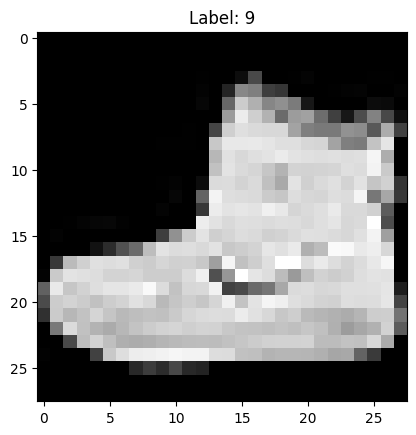

In [20]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
plt.title("Label: {}".format(y_train[0]))
plt.show()

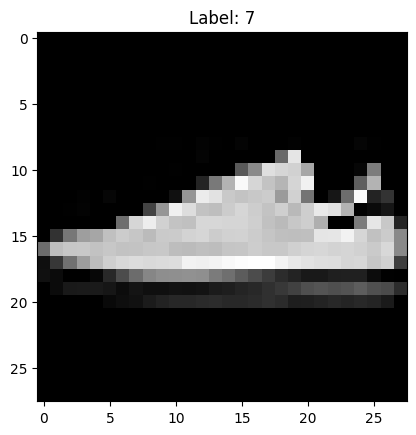

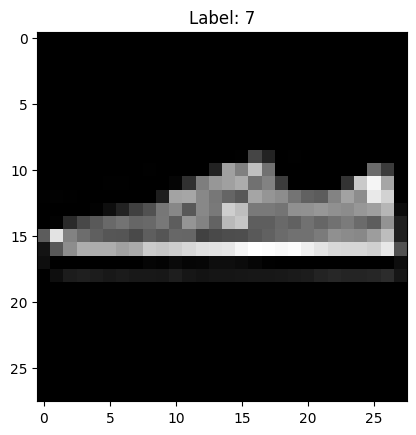

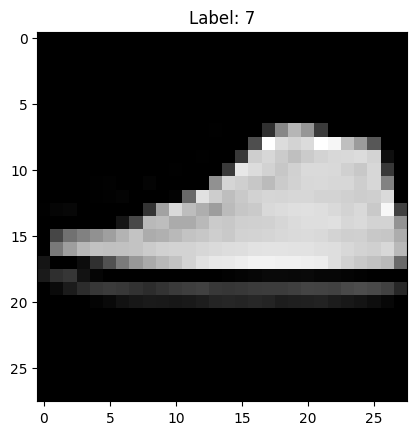

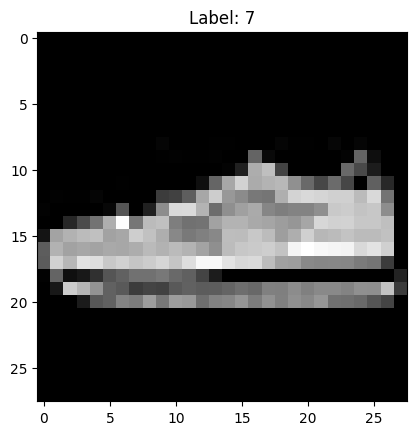

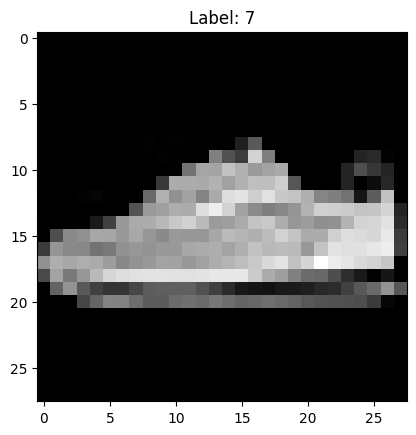

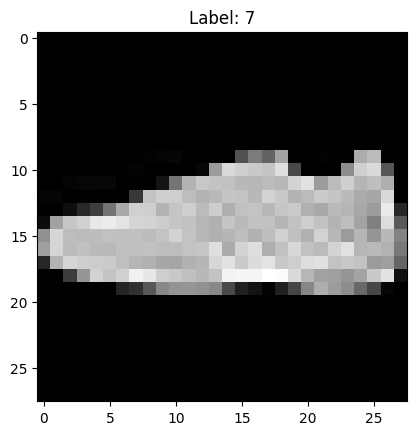

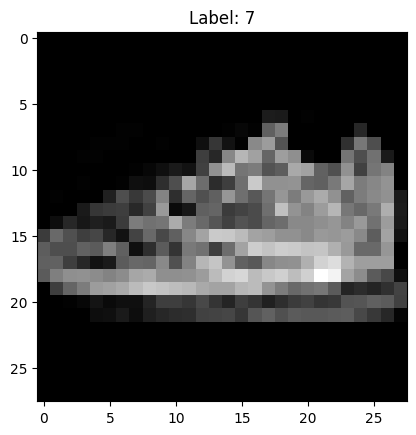

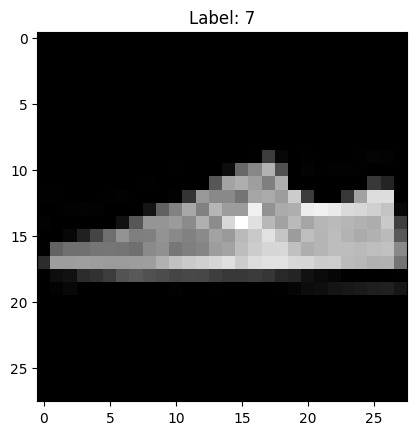

In [21]:
for i in range(100):
    if y_train[i] == 7:
        plt.imshow(X_train[i], cmap='gray')
        plt.title("Label: {}".format(y_train[i]))
        plt.show()

In [22]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [24]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# model.fit(
#     X_train, y_train,
#     epochs=10,
#     batch_size=64,
#     validation_split=0.2,  # Automatically split part of training data for validation
#     shuffle=True,
#     verbose=2
# ) # this code is for spilting the training data into training and validation sets

In [28]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # you can also use 'val_accuracy'
    patience=3,          # stop if no improvement after 3 epochs
    restore_best_weights=True
)


In [29]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7774 - loss: 0.6431 - val_accuracy: 0.8441 - val_loss: 0.4374
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8625 - loss: 0.3838 - val_accuracy: 0.8478 - val_loss: 0.4358
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8750 - loss: 0.3442 - val_accuracy: 0.8528 - val_loss: 0.4027
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8872 - loss: 0.3078 - val_accuracy: 0.8763 - val_loss: 0.3475
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8909 - loss: 0.2957 - val_accuracy: 0.8761 - val_loss: 0.3516
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8958 - loss: 0.2772 - val_accuracy: 0.8769 - val_loss: 0.3498
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9005 - loss: 0.2647 - val_accuracy: 0.8760 - val_loss: 0.3445
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9050 - loss: 0.2561 - 

In [30]:
# Suppose 'model' is your trained model
model.save("fashion_mnist_model.h5")


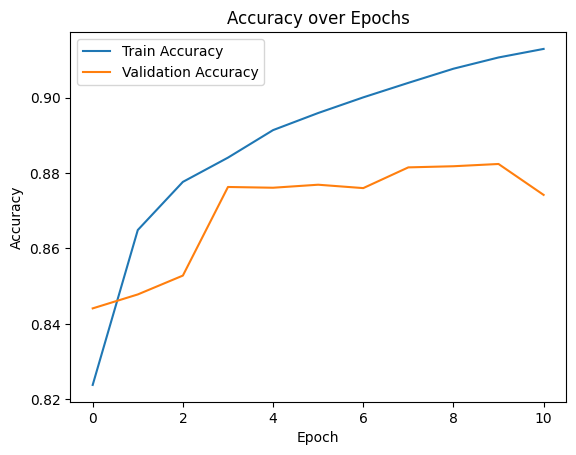

In [31]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

#If both increase and reach a good value →  Great!
#If training accuracy is high but validation accuracy is low →  Overfitting!
#If both are low →  Underfitting (maybe increase model complexity).


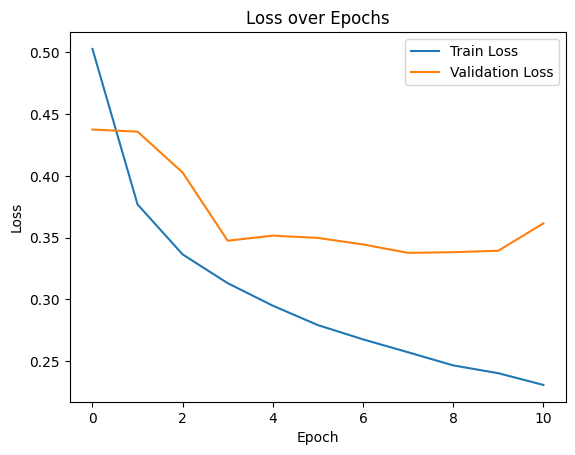

In [32]:
# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.show()

#Loss should generally decrease with each epoch.
#If val_loss starts increasing while train_loss keeps decreasing → the model is memorizing training data (overfitting).